In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# env
class Gridworld:
    def __init__(self, size=5, gamma=0.9):
        self.size = size
        self.gamma = gamma
        self.A = [0, 1]
        self.A_prime = [4, 1]
        self.B = [0, 3]
        self.B_prime = [2, 3]
        self.actions = [
            np.array([0, -1]),
            np.array([-1, 0]),
            np.array([0, 1]),
            np.array([1, 0])
        ]
        self.action_prob = 0.25

    # compute next state and reward given a state/action
    def step(self, state, action):
        if state == self.A:
            return self.A_prime, 10        # a -> a'
        if state == self.B:
            return self.B_prime, 5         # b -> b'

        next_state = (np.array(state) + action).tolist()
        x, y = next_state
        if x < 0 or x >= self.size or y < 0 or y >= self.size:
            return state, -1.0
        return next_state, 0               # normal move -> no reward


# algorithm
def value_iteration(env, tol=1e-4):
    V = np.zeros((env.size, env.size))     # initialize
    while True:
        new_V = np.zeros_like(V)
        for i in range(env.size):
            for j in range(env.size):
                for action in env.actions:
                    (ni, nj), reward = env.step([i, j], action)
                    new_V[i, j] += env.action_prob * (
                        reward + env.gamma * V[ni, nj]
                    )
        # stop when values converge
        if np.sum(np.abs(V - new_V)) < tol:
            return new_V
        V = new_V

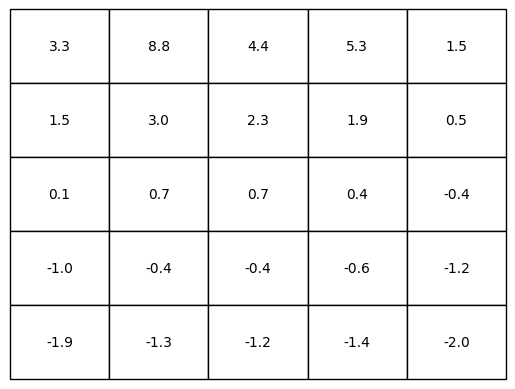

In [60]:
def figure3_2(values):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = values.shape
    width, height = 1.0 / ncols, 1.0 / nrows
    for (i, j), val in np.ndenumerate(values):
        table.add_cell(i, j, width, height,
                       text=np.round(val, 1),
                       loc='center', facecolor='white')
    ax.add_table(table)
    plt.show()

figure3_2(value_iteration(Gridworld()))
# matches right plot with numbers